# Preprocessing and Analysing the dataset

## Imports

In [1]:
# preprocessing, math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# helper functions
from helperFunctions import *

## Load dataset

In [2]:
# Source: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
pathToDataFiles = './datafiles/'
dataset = 'True.csv' # Fake.csv
df = pd.read_csv('dataset/' + dataset)

In [3]:
# Merge all textual input, discard the rest (except for the labels)
df.text = df.title + ' ' + df.text
df.rename(columns={'subject': 'label'},
          inplace=True, errors='raise')
df.drop(['title', 'date'], axis=1, errors='ignore', inplace=True)

In [4]:
df.shape

(21417, 2)

## Analyse

Are labels or texts missing?

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

How many classes does the dataset have? Which ones?

In [6]:
df.label.unique()

array(['politicsNews', 'worldnews'], dtype=object)

Is the dataset balanced?

(<AxesSubplot:>,
 politicsNews    11272
 worldnews       10145
 Name: label, dtype: int64)

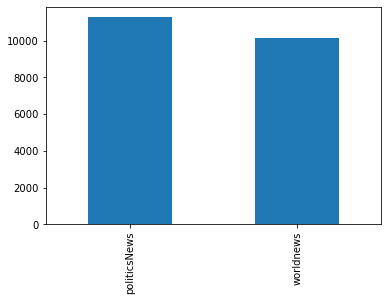

In [7]:
counts = df['label'].value_counts().sort_values(ascending=False)
counts.plot(kind='bar'), counts
# The Dataset is not perfectly balanced. 
# A naive baseline classificator could achieve > 50% Accuracy
# simply by picking the 'politicalNews' class.
# Use a weighted score in evaluation

In [8]:
# 11272-10145 = 1127
resample = df[df['label'] == 'worldnews'].sample(n=1127, replace=True, random_state=12345)
df = df.append(resample, ignore_index=True)

(<AxesSubplot:>,
 politicsNews    11272
 worldnews       11272
 Name: label, dtype: int64)

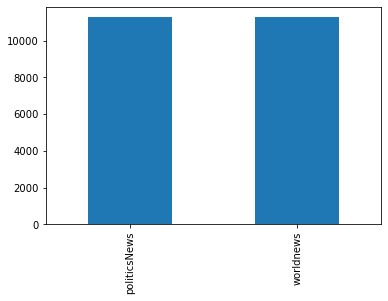

In [9]:
counts = df['label'].value_counts().sort_values(ascending=False)
counts.plot(kind='bar'), counts

Numeric Labels

In [10]:
le = LabelEncoder()
df.label = le.fit_transform(df.label)
df.head()

text  label
0  As U.S. budget fight looms, Republicans flip t...      0
1  U.S. military to accept transgender recruits o...      0
2  Senior U.S. Republican senator: 'Let Mr. Muell...      0
3  FBI Russia probe helped by Australian diplomat...      0
4  Trump wants Postal Service to charge 'much mor...      0

Clean text, remove symbols and stopwords

In [11]:
# this needs alot of cpu AND ram resources
df['text'] = df['text'].apply(preprocessNLFeature)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\User

text  label
0  u.s. budget fight looms republicans flip fisca...      0
1  u.s. military accept transgender recruits mond...      0
2  senior u.s. republican senator 'let mr. muelle...      0
3  fbi russia probe helped australian diplomat ti...      0
4  trump wants postal service charge 'much amazon...      0

In [12]:
df.to_csv(pathToDataFiles + 'dataset_preprocessed-' + dataset, sep='\t', index=False)